In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

import plotly.express as px
import scipy.stats as sts
import numpy as np

In [3]:
property_sales_file = os.path.join('property_sales.csv')
property_sales_df = pd.read_csv(property_sales_file)
property_sales_df.head()

,OBJECTID,CRV,Sale_Date,InRTOStudy,Neighborhoood,Ward,PropType,Address,HouseNumber,HouseNum,...,SuffixDire,Grantee,Grantor,Adjusted_S,Gross_Sale,SaleDate,Downpayment,X,Y,PIN_TEXT
0,10001,204924.0,2014-02-26T00:00:00.000Z,No,VICTORY,4,Residential,4526 Xerxes AVE N,4526,NaN,...,N,David Anderson,Janet L Rollmann,155103,159900.0,2014-02-26T00:00:00.000Z,15990.0,516655.530538,190166.659712,1111821330128
1,10002,233969.0,2014-06-25T00:00:00.000Z,Yes,VICTORY,4,Residential,4566 Xerxes AVE N,4566,NaN,...,N,Darryl L Bell,Deborah J Boardley,162000,169500.0,2014-06-25T00:00:00.000Z,4448.0,516643.782209,190666.537525,1111821330138
2,10003,233969.0,2014-06-25T00:00:00.000Z,Yes,VICTORY,4,Residential,4566 Xerxes AVE N,4566,NaN,...,N,Darryl L Bell,Tracy Everson,162000,169500.0,2014-06-25T00:00:00.000Z,4448.0,516643.782209,190666.537525,1111821330138
3,10004,71027.0,2014-07-18T00:00:00.000Z,Yes,VICTORY,4,Residential,4574 Xerxes AVE N,4574,NaN,...,N,Krista M Torning,Karen L Holland,162500,162500.0,2014-07-18T00:00:00.000Z,NaN,516641.329215,190769.809892,1111821330140
4,10005,272354.0,2014-10-10T00:00:00.000Z,Yes,LINDEN HILLS,13,Residential,4600 Xerxes AVE S,4600,NaN,...,S,Robert W Nichols III,Brian D Renbarger,277900,284900.0,2014-10-10T00:00:00.000Z,2000.0,516598.558439,146839.634287,1702824210001


In [4]:
PropSales = property_sales_df['Gross_Sale'].dropna()

Q1 = PropSales.quantile(0.25)
Q3 = PropSales.quantile(0.75)
IQR = Q3 - Q1

PropSales_normalized = property_sales_df[(property_sales_df['Gross_Sale'] < Q3) & (property_sales_df['Gross_Sale'] > Q1)]
property_sales_df = PropSales_normalized['Gross_Sale']

In [5]:
sample = property_sales_df.sample(frac = 0.5)
population = property_sales_df
sts.ttest_1samp(sample, population.mean())


Ttest_1sampResult(statistic=0.45109994300880013, pvalue=0.6519566583472839)

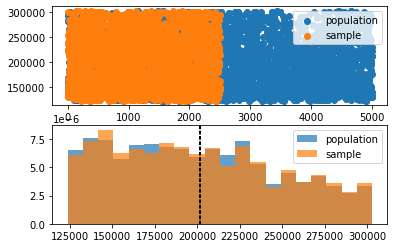

In [6]:
#plot
plt.subplot(2, 1, 1)
plt.scatter(range(len(population)), population, label="population")
plt.scatter(range(len(sample)), sample, label="sample")
plt.legend()

# Hist. Plot
plt.subplot(2, 1, 2)
plt.hist(population, 20, density=True, alpha=0.7, label="population")
plt.hist(sample, 20, density=True, alpha=0.7, label="sample")
plt.axvline(population.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(sample.mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend() 

In [9]:
sample = property_sales_df.sample(frac = 0.2)
population = property_sales_df
sts.ttest_1samp(sample, population.mean())

Ttest_1sampResult(statistic=-0.6181376378438624, pvalue=0.5366255074259756)

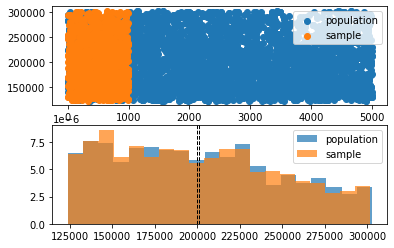

In [10]:
#plot
plt.subplot(2, 1, 1)
plt.scatter(range(len(population)), population, label="population")
plt.scatter(range(len(sample)), sample, label="sample")
plt.legend()

# Hist. plot
plt.subplot(2, 1, 2)
plt.hist(population, 20, density=True, alpha=0.7, label="population")
plt.hist(sample, 20, density=True, alpha=0.7, label="sample")
plt.axvline(population.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(sample.mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend() 